In [114]:
import pandas as pd
from statsmodels.stats.multitest import fdrcorrection 
from matplotlib import pyplot as plt
import numpy as np

## Data

In [115]:
male_df = pd.read_csv('male_df_mean.csv',index_col=0)

In [116]:
male_df

,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,...,Vermis_1_2,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10,age,memory
0,-0.014675,0.032044,-0.017119,-0.005283,0.034559,0.000874,-0.057017,0.022946,-0.052411,-0.068811,...,0.032192,0.016883,-0.006542,-0.029374,0.017168,-0.009313,0.020869,0.039772,65.0,0
1,0.125976,-0.251426,0.058481,-0.008106,-0.070338,0.169597,-0.035253,-0.165096,-0.034029,0.058612,...,0.044873,0.061963,0.019157,-0.101305,0.018055,-0.105131,-0.005909,0.051939,41.0,0
2,-0.245585,-0.288723,-0.143071,-0.090248,-0.211515,0.066439,-0.146143,-0.173653,-0.081022,-0.059027,...,0.142575,0.023851,-0.046338,-0.018320,-0.049783,-0.028012,-0.020075,0.169580,59.0,0
3,-0.021324,-0.124016,0.019174,-0.002643,-0.122081,-0.078923,0.038883,-0.069970,-0.075918,-0.084647,...,0.096370,0.034016,-0.006356,-0.013854,-0.028824,0.069908,-0.019214,0.048825,61.0,0
4,0.283613,0.427075,-0.299102,-0.031762,-0.119224,0.063462,-0.240391,-0.201018,-0.280458,0.099458,...,0.214083,-0.011231,-0.130887,0.066937,0.110924,-0.051909,-0.006733,-0.084046,43.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,-0.062913,-0.040609,-0.035229,0.000600,-0.026991,0.001176,-0.058882,0.004040,-0.092836,-0.028075,...,0.014860,-0.001525,0.022202,-0.008573,0.037651,-0.032933,0.023180,0.032318,61.0,0
208,0.126324,-0.230668,0.187286,0.060239,0.126372,0.225707,-0.077662,-0.025511,0.059563,-0.009301,...,0.123168,0.018108,-0.003535,-0.070251,-0.155904,0.081969,-0.058511,-0.121745,58.0,0
209,-0.273501,-0.532079,0.233982,0.100574,-0.279791,-0.184623,-0.088608,-0.112235,-0.138738,-0.080983,...,-0.265719,0.121184,0.122646,0.122342,0.192914,0.099273,0.184001,0.246567,53.0,1
210,0.571183,0.545972,0.382586,0.117833,-0.203390,-0.189047,0.102181,0.277319,0.100225,0.091054,...,0.148419,0.006745,0.169221,0.140198,-0.040169,0.058231,0.022805,0.075048,56.0,1


In [117]:
male_df['sex'] = 1

In [118]:
female_df = pd.read_csv('female_df_mean.csv',index_col=0)

In [119]:
female_df['sex']=0

In [120]:
female_df

,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,...,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10,age,memory,sex
0,-0.061240,-0.038197,-0.005487,-0.058074,0.045556,-0.013688,0.010445,-0.059099,-0.067896,-0.014316,...,0.020444,0.083585,0.003734,-0.092256,-0.074281,-0.015142,0.068735,55.0,0,0
1,-0.300558,-0.453749,-0.145671,-0.168950,0.355200,0.163168,0.213074,0.319060,0.135507,0.117956,...,0.060889,0.153692,0.180704,0.348136,0.375841,0.211869,-0.165364,49.0,1,0
2,0.097410,-0.012210,0.041974,-0.040462,0.100917,-0.021401,0.045815,-0.010104,0.052863,-0.014873,...,0.125382,0.091023,0.039927,-0.118928,-0.141451,-0.064838,0.008461,56.0,0,0
3,-0.612287,-0.626283,-0.511085,-0.348809,0.285952,0.206160,0.267835,0.324765,0.209328,0.116337,...,0.257542,0.248615,0.285817,0.289738,0.427796,0.320585,-0.288549,61.0,1,0
4,0.018850,-0.011888,-0.078556,0.022501,0.045584,0.019136,-0.052530,-0.109293,-0.012564,-0.034840,...,0.150401,0.060729,-0.079262,-0.131686,-0.096489,-0.054390,-0.017084,68.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,-0.428186,-0.376374,-0.258498,-0.139326,0.086817,0.137435,0.053848,0.132907,-0.009147,0.015764,...,0.172590,0.128702,0.218411,0.283834,0.299663,0.293128,0.203502,41.0,1,0
255,-0.334840,-0.450319,-0.448493,0.103467,0.081546,0.084077,0.103358,0.080200,-0.024174,0.044976,...,0.172742,0.130334,0.212402,0.323414,0.326624,0.232688,0.185263,44.0,1,0
256,-0.004563,0.003812,0.158296,-0.054352,-0.065135,-0.044469,0.045456,-0.049530,-0.113319,0.062070,...,0.086002,0.094560,-0.049186,-0.177634,-0.176182,-0.162668,0.001342,43.0,0,0
257,0.113027,0.142858,0.064957,0.110827,-0.134438,-0.122321,-0.094602,0.163263,-0.090234,-0.090783,...,-0.014852,-0.115917,0.037867,-0.107597,-0.181852,-0.101304,0.067862,52.0,0,0


## Performing 1 sample t-test

In [121]:
all_df = pd.concat([male_df,female_df],ignore_index=True)

In [122]:
all_df

,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,...,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10,age,memory,sex
0,-0.014675,0.032044,-0.017119,-0.005283,0.034559,0.000874,-0.057017,0.022946,-0.052411,-0.068811,...,0.016883,-0.006542,-0.029374,0.017168,-0.009313,0.020869,0.039772,65.0,0,1
1,0.125976,-0.251426,0.058481,-0.008106,-0.070338,0.169597,-0.035253,-0.165096,-0.034029,0.058612,...,0.061963,0.019157,-0.101305,0.018055,-0.105131,-0.005909,0.051939,41.0,0,1
2,-0.245585,-0.288723,-0.143071,-0.090248,-0.211515,0.066439,-0.146143,-0.173653,-0.081022,-0.059027,...,0.023851,-0.046338,-0.018320,-0.049783,-0.028012,-0.020075,0.169580,59.0,0,1
3,-0.021324,-0.124016,0.019174,-0.002643,-0.122081,-0.078923,0.038883,-0.069970,-0.075918,-0.084647,...,0.034016,-0.006356,-0.013854,-0.028824,0.069908,-0.019214,0.048825,61.0,0,1
4,0.283613,0.427075,-0.299102,-0.031762,-0.119224,0.063462,-0.240391,-0.201018,-0.280458,0.099458,...,-0.011231,-0.130887,0.066937,0.110924,-0.051909,-0.006733,-0.084046,43.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,-0.428186,-0.376374,-0.258498,-0.139326,0.086817,0.137435,0.053848,0.132907,-0.009147,0.015764,...,0.172590,0.128702,0.218411,0.283834,0.299663,0.293128,0.203502,41.0,1,0
467,-0.334840,-0.450319,-0.448493,0.103467,0.081546,0.084077,0.103358,0.080200,-0.024174,0.044976,...,0.172742,0.130334,0.212402,0.323414,0.326624,0.232688,0.185263,44.0,1,0
468,-0.004563,0.003812,0.158296,-0.054352,-0.065135,-0.044469,0.045456,-0.049530,-0.113319,0.062070,...,0.086002,0.094560,-0.049186,-0.177634,-0.176182,-0.162668,0.001342,43.0,0,0
469,0.113027,0.142858,0.064957,0.110827,-0.134438,-0.122321,-0.094602,0.163263,-0.090234,-0.090783,...,-0.014852,-0.115917,0.037867,-0.107597,-0.181852,-0.101304,0.067862,52.0,0,0


#### changing the position of the columns on the dataframe 

In [123]:
header = all_df.columns.tolist()[:]

In [124]:
header[-2],header[-1] = header[-1],header[-2] 

In [125]:
all_df = all_df[header]

In [126]:
low_memory = all_df[all_df['memory'] == 0]
high_memory = all_df[all_df['memory'] == 1]

#### ttest

In [127]:
from scipy.stats import ttest_1samp

In [128]:
# low_memory = low_memory * -1
# low_memory['sex'] = low_memory['sex'] * -1
# low_memory['memory'] = low_memory['memory'] * -1
# low_memory['age'] = low_memory['age'] * -1 
# all_df = pd.concat([high_memory,low_memory],ignore_index=True)

In [129]:
tval,pval = ttest_1samp(all_df.iloc[:,:-3].values.tolist(),popmean=0,axis=0)

In [130]:
pval

array([4.55602175e-05, 7.06384641e-04, 4.92323850e-04, 5.75821759e-05,
       1.25041905e-03, 5.57250986e-07, 9.61890699e-05, 2.70419354e-03,
       3.09429875e-03, 1.58344268e-12, 1.22643955e-06, 5.51372456e-19,
       1.01586361e-13, 1.95480245e-10, 4.55674890e-09, 1.91226865e-04,
       2.22826436e-06, 2.82912646e-14, 6.01160012e-05, 1.07807764e-01,
       4.59870483e-11, 9.21103582e-07, 5.50661377e-03, 8.36418150e-06,
       1.41504715e-04, 8.04884816e-05, 6.13799808e-03, 4.26559243e-02,
       4.68031454e-12, 2.49470326e-20, 2.89515267e-06, 2.20731049e-09,
       1.35830213e-08, 4.67639403e-03, 1.74136325e-05, 6.66490177e-01,
       5.79846473e-12, 5.67152073e-19, 3.95246798e-21, 3.29238866e-25,
       1.47795786e-22, 1.46693030e-18, 1.00003076e-10, 1.00716198e-04,
       7.13697073e-11, 2.61153862e-09, 4.17760112e-06, 2.85808262e-06,
       1.97074593e-12, 6.39494313e-10, 2.46507535e-06, 3.78526803e-18,
       6.72507459e-06, 4.28800877e-04, 1.88649274e-01, 3.58353079e-01,
      

In [131]:
region_pvals = dict(sorted({header[i]:(pval[i],tval[i]) for i in range(len(tval)) if pval[i] < (0.05/116) and tval[i]>0}.items(),key = lambda x:x[1][1],reverse=True))

In [132]:
region_pvals

{'Putamen_R': (1.274967246209521e-26, 11.36755407525032),
 'ParaHippocampal_R': (3.2923886581214947e-25, 11.002345867842056),
 'Angular_L': (1.1767444608525433e-22, 10.323379248603676),
 'Amygdala_L': (1.4779578639332689e-22, 10.29652113369198),
 'ParaHippocampal_L': (3.952467979549204e-21, 9.904276926277271),
 'Insula_R': (2.494703258021987e-20, 9.680018529119804),
 'Temporal_Sup_L': (4.266471309483217e-19, 9.327653455910161),
 'Frontal_Inf_Oper_R': (5.513724563423582e-19, 9.295393640445841),
 'Hippocampus_R': (5.671520731397197e-19, 9.291839610908532),
 'Angular_R': (7.367853287650294e-19, 9.258838000249591),
 'Amygdala_R': (1.4669302994790232e-18, 9.171608655305146),
 'Occipital_Mid_R': (3.785268028585742e-18, 9.050607806231271),
 'Caudate_R': (4.749592075233451e-17, 8.72216077154093),
 'Parietal_Inf_L': (8.759905020367958e-16, 8.332649038266194),
 'SupraMarginal_R': (1.4881762421150396e-14, 7.941202367435992),
 'Cerebelum_4_5_R': (2.1929591224601746e-14, 7.886527937515093),
 'Rolan

In [133]:
df_ttest = pd.DataFrame.from_dict(region_pvals).T

In [134]:
df_ttest.columns = ['p-value','t-value']

In [135]:
df_ttest.to_csv('df_ttest.csv')

In [136]:
regions_remaining = list(region_pvals.keys()) + header[-3:]

# Ancova

## Ancova for all subjects

In [137]:
from pingouin import ancova

In [138]:
low_memory = all_df[all_df['memory'] == 0]
high_memory = all_df[all_df['memory'] == 1]

In [139]:
low_memory

,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,...,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10,age,sex,memory
0,-0.014675,0.032044,-0.017119,-0.005283,0.034559,0.000874,-0.057017,0.022946,-0.052411,-0.068811,...,0.016883,-0.006542,-0.029374,0.017168,-0.009313,0.020869,0.039772,65.0,1,0
1,0.125976,-0.251426,0.058481,-0.008106,-0.070338,0.169597,-0.035253,-0.165096,-0.034029,0.058612,...,0.061963,0.019157,-0.101305,0.018055,-0.105131,-0.005909,0.051939,41.0,1,0
2,-0.245585,-0.288723,-0.143071,-0.090248,-0.211515,0.066439,-0.146143,-0.173653,-0.081022,-0.059027,...,0.023851,-0.046338,-0.018320,-0.049783,-0.028012,-0.020075,0.169580,59.0,1,0
3,-0.021324,-0.124016,0.019174,-0.002643,-0.122081,-0.078923,0.038883,-0.069970,-0.075918,-0.084647,...,0.034016,-0.006356,-0.013854,-0.028824,0.069908,-0.019214,0.048825,61.0,1,0
6,-0.127650,-0.087102,0.032239,-0.008337,0.002699,0.011687,-0.039129,-0.073606,-0.025940,0.047857,...,-0.189109,-0.153586,-0.029721,0.026705,-0.255587,-0.055617,-0.043922,57.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0.069923,0.141998,0.081758,0.004104,-0.120864,-0.078617,-0.086511,-0.270874,-0.135721,-0.085605,...,0.023093,-0.118788,-0.150747,-0.256851,-0.166100,-0.058057,0.008668,62.0,0,0
465,-0.024940,-0.081974,-0.014682,-0.042610,0.071202,0.013624,0.011919,-0.024333,0.005406,0.062356,...,0.035348,-0.012009,-0.002344,-0.075629,-0.080766,-0.050972,0.009814,60.0,0,0
468,-0.004563,0.003812,0.158296,-0.054352,-0.065135,-0.044469,0.045456,-0.049530,-0.113319,0.062070,...,0.086002,0.094560,-0.049186,-0.177634,-0.176182,-0.162668,0.001342,43.0,0,0
469,0.113027,0.142858,0.064957,0.110827,-0.134438,-0.122321,-0.094602,0.163263,-0.090234,-0.090783,...,-0.014852,-0.115917,0.037867,-0.107597,-0.181852,-0.101304,0.067862,52.0,0,0


In [140]:
high_memory

,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,...,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10,age,sex,memory
4,0.283613,0.427075,-0.299102,-0.031762,-0.119224,0.063462,-0.240391,-0.201018,-0.280458,0.099458,...,-0.011231,-0.130887,0.066937,0.110924,-0.051909,-0.006733,-0.084046,43.0,1,1
5,0.388833,0.546778,0.383485,0.238826,-0.235466,-0.218189,0.194054,0.405232,0.187459,-0.189115,...,-0.077865,-0.101440,-0.051835,-0.033920,-0.031388,-0.118006,-0.239659,46.0,1,1
16,0.340666,-0.496994,-0.382481,0.284361,-0.222792,-0.216938,-0.096883,0.261839,0.154688,0.003965,...,0.018427,-0.081160,-0.069532,-0.039688,0.003393,-0.082588,0.091284,43.0,1,1
18,-0.240668,-0.372364,0.372088,0.139995,-0.171618,-0.168646,0.091275,0.259496,-0.149889,0.127505,...,0.057655,0.156971,0.061880,0.135614,-0.145028,0.111965,0.091637,52.0,1,1
20,0.410673,0.459545,-0.436543,-0.158183,-0.274946,-0.060986,-0.124618,-0.150081,-0.107296,-0.163834,...,0.100144,0.141678,0.121050,0.190855,0.119834,0.061425,0.277108,54.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,-0.262557,-0.325777,-0.370617,-0.084658,0.226646,0.115719,0.206830,0.220556,0.167755,0.142190,...,-0.023170,0.053114,0.110094,0.256403,0.307562,0.199377,-0.139061,53.0,0,1
462,-0.174447,-0.259283,-0.077688,-0.092079,0.076610,0.004234,0.059926,0.102294,0.024840,-0.007814,...,-0.002186,0.097252,0.229748,0.420135,0.388709,0.242788,0.284321,52.0,0,1
463,-0.235199,-0.462831,-0.276635,-0.290896,0.092223,0.187667,0.105006,0.148699,0.090452,0.005826,...,-0.003891,0.084457,0.106916,0.249227,0.304061,0.309782,0.029297,47.0,0,1
466,-0.428186,-0.376374,-0.258498,-0.139326,0.086817,0.137435,0.053848,0.132907,-0.009147,0.015764,...,0.172590,0.128702,0.218411,0.283834,0.299663,0.293128,0.203502,41.0,0,1


In [141]:
all_df_filtered = all_df[regions_remaining]

In [142]:
ancv = ancova(all_df_filtered,dv = 'Putamen_R', between = 'memory',covar=['sex','age'])

In [143]:
ancv

,Source,SS,DF,F,p-unc,np2
0,memory,0.132503,1,7.241654,7.378647e-03,0.015270
1,sex,2.198966,1,120.179257,4.847578e-25,0.204672
2,age,0.097412,1,5.323835,2.147215e-02,0.011272
3,Residual,8.544879,467,NaN,NaN,NaN


In [144]:
ancvs = [ancova(all_df_filtered,dv = h, between = 'memory',covar=['sex','age']) for h in regions_remaining[:-3]]

#### FDR for memory

In [145]:
memory_pvals = {header:ancv.loc[[0],['p-unc']].values[0][0] for ancv,header in zip(ancvs,regions_remaining[:-3]) if ancv.loc[[0],['p-unc']].values[0][0] < (0.05/73)}

In [146]:
memory_fscores = {header:ancv.loc[[0],['F']].values[0] for ancv,header in zip(ancvs,regions_remaining[:-3]) if ancv.loc[[0],['p-unc']].values[0][0] < (0.05/73)}

In [147]:
memory_pvals = dict(sorted(memory_pvals.items(),key=lambda x:x[1]))

In [148]:
memory_pvals

{'Heschl_R': 2.891956579747198e-57,
 'Temporal_Sup_R': 2.7130328164853375e-54,
 'Rolandic_Oper_L': 2.544730420770163e-53,
 'Calcarine_L': 9.170463186254485e-53,
 'Frontal_Med_Orb_R': 1.1289983063974963e-50,
 'Lingual_R': 2.6228489564637385e-49,
 'Cingulum_Post_L': 4.144483022248726e-49,
 'Temporal_Mid_R': 5.506391705012959e-47,
 'Lingual_L': 8.934754493189487e-46,
 'Frontal_Med_Orb_L': 1.1637724831430832e-44,
 'Caudate_L': 9.819925100259121e-42,
 'Occipital_Mid_L': 1.1249676639247639e-39,
 'Occipital_Inf_R': 6.939590339369032e-39,
 'Cingulum_Ant_R': 5.956165840023922e-37,
 'Cingulum_Ant_L': 9.20711407550903e-34,
 'Temporal_Mid_L': 1.0282277687351095e-33,
 'Temporal_Pole_Sup_L': 3.7441526585009997e-32,
 'Occipital_Inf_L': 4.2901791156352217e-32,
 'Insula_L': 1.2604898633915677e-31,
 'Frontal_Inf_Orb_R': 9.416259653409915e-31,
 'Calcarine_R': 1.4069343395070257e-29,
 'Precuneus_L': 1.70397028532293e-28,
 'Temporal_Pole_Mid_R': 8.367284555559294e-26,
 'Temporal_Pole_Mid_L': 1.481499906468

In [149]:
memory_pvals1 = {k:(v,) for k,v in memory_pvals.items()}

In [154]:
correction_pass,mem_pval = fdrcorrection(list(memory_pvals.values()),method='negcorr',is_sorted=True)

In [155]:
correction_pass

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

#### FDR for sex

In [156]:
sex_pvals = {header:ancv.loc[[1],['p-unc']].values[0][0] for ancv,header in zip(ancvs,regions_remaining[:-3]) if ancv.loc[[1],['p-unc']].values[0][0] < (0.05/73)}

In [157]:
sex_pvals = dict(sorted(sex_pvals.items(),key=lambda x:x[1]))

In [182]:
sex_pvals1 = {k:(v,) for k,v in sex_pvals.items()}

In [158]:
sex_pvals

{'Putamen_R': 4.847577808321278e-25,
 'Frontal_Inf_Tri_L': 3.89573189046448e-17,
 'ParaHippocampal_L': 5.2944378059563474e-17,
 'ParaHippocampal_R': 5.599273026721456e-17,
 'Amygdala_L': 9.978679346748281e-16,
 'Hippocampus_R': 1.0129135620257567e-14,
 'Amygdala_R': 2.1966340859794804e-14,
 'Olfactory_L': 1.7517945852065736e-13,
 'Caudate_R': 1.827576251655224e-13,
 'Temporal_Pole_Mid_L': 2.2527664189740091e-13,
 'Temporal_Inf_R': 1.0771316535438657e-12,
 'Parietal_Inf_L': 1.7855261920337414e-12,
 'Cerebelum_4_5_R': 4.600195167947343e-12,
 'Angular_R': 2.3903050057526204e-11,
 'Occipital_Sup_L': 5.751542444977536e-10,
 'Temporal_Inf_L': 5.949977482746836e-10,
 'Cerebelum_7b_R': 5.907434763994741e-09,
 'Angular_L': 1.0220970161887944e-08,
 'Vermis_3': 1.430618420062649e-08,
 'Hippocampus_L': 2.159701600814352e-08,
 'Precuneus_R': 2.4032635685127626e-08,
 'Supp_Motor_Area_L': 2.5701646832155995e-08,
 'Frontal_Inf_Oper_R': 2.597910516002167e-08,
 'Heschl_L': 1.150373293512267e-07,
 'Tempo

In [183]:
correction_pass,sex_pvals_corrected = fdrcorrection(list(sex_pvals.values()),method='negcorr',is_sorted=True)

#### FDR for age

In [160]:
age_pvals = {header:ancv.loc[[2],['p-unc']].values[0][0] for ancv,header in zip(ancvs,regions_remaining[:-3]) if ancv.loc[[2],['p-unc']].values[0][0] < (0.05/73)}

In [161]:
age_pvals = dict(sorted(age_pvals.items(),key=lambda x:x[1]))

In [162]:
age_pvals

{'Heschl_L': 2.0495850203652536e-05}

#### Logistic regression to understand the direction 

In [163]:
from sklearn.linear_model import LinearRegression

In [166]:
for k,v in memory_pvals1.items():
    X,y  = all_df_filtered[['memory','sex','age']],all_df_filtered[k]
    clf = LinearRegression().fit(X, y)
    coef = clf.coef_[0]

    memory_pvals1[k] = (v[0],coef)
    if coef < 0:
        print(k) 

Frontal_Inf_Tri_L
ParaHippocampal_R


In [170]:
df_mpvals = pd.DataFrame.from_dict( memory_pvals1).T
df_mpvals = df_mpvals.reset_index()
df_mpvals.columns = ['Regions','p-value','Effect Size']
df_mpvals.to_csv('df_mpvals.csv')

In [61]:
memory_pvals

{'Heschl_R': 2.891956579747198e-57,
 'Temporal_Sup_R': 2.7130328164853375e-54,
 'Rolandic_Oper_L': 2.544730420770163e-53,
 'Calcarine_L': 9.170463186254485e-53,
 'Frontal_Med_Orb_R': 1.1289983063974963e-50,
 'Lingual_R': 2.6228489564637385e-49,
 'Cingulum_Post_L': 4.144483022248726e-49,
 'Temporal_Mid_R': 5.506391705012959e-47,
 'Lingual_L': 8.934754493189487e-46,
 'Frontal_Med_Orb_L': 1.1637724831430832e-44,
 'Caudate_L': 9.819925100259121e-42,
 'Occipital_Mid_L': 1.1249676639247639e-39,
 'Occipital_Inf_R': 6.939590339369032e-39,
 'Cingulum_Ant_R': 5.956165840023922e-37,
 'Cingulum_Ant_L': 9.20711407550903e-34,
 'Temporal_Mid_L': 1.0282277687351095e-33,
 'Temporal_Pole_Sup_L': 3.7441526585009997e-32,
 'Occipital_Inf_L': 4.2901791156352217e-32,
 'Insula_L': 1.2604898633915677e-31,
 'Frontal_Inf_Orb_R': 9.416259653409915e-31,
 'Calcarine_R': 1.4069343395070257e-29,
 'Precuneus_L': 1.70397028532293e-28,
 'Temporal_Pole_Mid_R': 8.367284555559294e-26,
 'Temporal_Pole_Mid_L': 1.481499906468

In [188]:
sex_pvals_reg = sex_pvals.copy()

In [184]:
for k,v in sex_pvals1.items():
    X,y  = all_df_filtered[['memory','sex','age']],all_df_filtered[k]
    clf = LinearRegression().fit(X, y)
    coef = clf.coef_[1]

    sex_pvals1[k] = (v[0],coef)
    if coef < 0:
        print(k) 

Putamen_R
Frontal_Inf_Tri_L
ParaHippocampal_L
ParaHippocampal_R
Amygdala_L
Hippocampus_R
Amygdala_R
Olfactory_L
Caudate_R
Temporal_Pole_Mid_L
Temporal_Inf_R
Parietal_Inf_L
Cerebelum_4_5_R
Angular_R
Occipital_Sup_L
Temporal_Inf_L
Cerebelum_7b_R
Angular_L
Vermis_3
Hippocampus_L
Precuneus_R
Supp_Motor_Area_L
Frontal_Inf_Oper_R
Heschl_L
Temporal_Pole_Sup_R
Frontal_Mid_Orb_R
Cerebelum_3_L
Temporal_Sup_L
Lingual_L
Parietal_Inf_R
Frontal_Inf_Tri_R
Cerebelum_9_L
Vermis_4_5
Calcarine_R
Putamen_L
Occipital_Mid_R
Cuneus_R
Calcarine_L
SupraMarginal_R
Rolandic_Oper_R
Occipital_Sup_R
Frontal_Sup_Orb_R
Cuneus_L
Occipital_Inf_L
Frontal_Inf_Orb_L
Vermis_1_2
Lingual_R
Caudate_L
Olfactory_R
Temporal_Pole_Mid_R


In [185]:
sex_pvals1

{'Putamen_R': (4.847577808321278e-25, -0.13774953984307164),
 'Frontal_Inf_Tri_L': (3.89573189046448e-17, -0.07468286995520945),
 'ParaHippocampal_L': (5.2944378059563474e-17, -0.12376396552194113),
 'ParaHippocampal_R': (5.599273026721456e-17, -0.13335444403571928),
 'Amygdala_L': (9.978679346748281e-16, -0.0968058505943597),
 'Hippocampus_R': (1.0129135620257567e-14, -0.11059137478585529),
 'Amygdala_R': (2.1966340859794804e-14, -0.09114704136470815),
 'Olfactory_L': (1.7517945852065736e-13, -0.06490621977291897),
 'Caudate_R': (1.827576251655224e-13, -0.08809669234830643),
 'Temporal_Pole_Mid_L': (2.2527664189740091e-13, -0.07189766388066839),
 'Temporal_Inf_R': (1.0771316535438657e-12, -0.09360765034124102),
 'Parietal_Inf_L': (1.7855261920337414e-12, -0.05686750836860963),
 'Cerebelum_4_5_R': (4.600195167947343e-12, -0.10964864621505603),
 'Angular_R': (2.3903050057526204e-11, -0.057370245660258036),
 'Occipital_Sup_L': (5.751542444977536e-10, -0.06007246770601178),
 'Temporal_Inf

In [186]:
df_spvals = pd.DataFrame.from_dict( sex_pvals1).T
df_spvals = df_spvals.reset_index()
df_spvals.columns = ['Regions','p-value','Effect Size']
df_spvals.to_csv('df_spvals.csv')

In [189]:
dict(sorted(sex_pvals_reg.items(),key=lambda x:x[1]))

{'Putamen_R': 4.847577808321278e-25,
 'Frontal_Inf_Tri_L': 3.89573189046448e-17,
 'ParaHippocampal_L': 5.2944378059563474e-17,
 'ParaHippocampal_R': 5.599273026721456e-17,
 'Amygdala_L': 9.978679346748281e-16,
 'Hippocampus_R': 1.0129135620257567e-14,
 'Amygdala_R': 2.1966340859794804e-14,
 'Olfactory_L': 1.7517945852065736e-13,
 'Caudate_R': 1.827576251655224e-13,
 'Temporal_Pole_Mid_L': 2.2527664189740091e-13,
 'Temporal_Inf_R': 1.0771316535438657e-12,
 'Parietal_Inf_L': 1.7855261920337414e-12,
 'Cerebelum_4_5_R': 4.600195167947343e-12,
 'Angular_R': 2.3903050057526204e-11,
 'Occipital_Sup_L': 5.751542444977536e-10,
 'Temporal_Inf_L': 5.949977482746836e-10,
 'Cerebelum_7b_R': 5.907434763994741e-09,
 'Angular_L': 1.0220970161887944e-08,
 'Vermis_3': 1.430618420062649e-08,
 'Hippocampus_L': 2.159701600814352e-08,
 'Precuneus_R': 2.4032635685127626e-08,
 'Supp_Motor_Area_L': 2.5701646832155995e-08,
 'Frontal_Inf_Oper_R': 2.597910516002167e-08,
 'Heschl_L': 1.150373293512267e-07,
 'Tempo

In [178]:
age_pvals

{'Heschl_L': 2.0495850203652536e-05}

In [177]:
age_pvals_reg = age_pvals.copy()

In [181]:
for k,v in age_pvals.items():
    X,y  = all_df_filtered[['memory','sex','age']],all_df_filtered[k]
    clf = LinearRegression().fit(X, y)
    coef = clf.coef_[2]
    if coef < 0:
        age_pvals_reg[k] = -v 
        print(k)

Heschl_L


# Plots

In [66]:
from nilearn.image import load_img,resample_img
from nilearn.image import new_img_like 
from nilearn.plotting import plot_stat_map
from nibabel import save
from matplotlib import pyplot as plt
import nibabel as nib
 
imf = load_img('/trdapps/linux-x86_64/matlab/toolboxes/spm12/tpm/labels_Neuromorphometrics.nii')
aal = load_img('/data/users2/pnadigapusuresh1/Downloads/AAL3/AAL3v1.nii.gz')
aal_resampled = resample_img('/data/users2/pnadigapusuresh1/Downloads/AAL3/aal.nii.gz',target_affine=imf.affine,target_shape=imf.shape,interpolation = 'nearest')

In [67]:
cuts = np.array([-45,-40,-30,-20,-10,-5,0,10,15,20,25,30,35,40,45,50])
cuts.resize(16)
cuts = cuts.reshape(4,4)

In [68]:
df = pd.read_csv('/data/users2/pnadigapusuresh1/Downloads/AAL3/aal.nii.txt',sep=' ',index_col=0,header=None,usecols=[0,1],names=['value','regions'])

#### ttest plot

In [69]:
r_p = {k:v[1] for k,v in region_pvals.items()}

In [70]:
stat_map = np.zeros_like(aal_resampled.get_fdata(),dtype=np.float)

/tmp/ipykernel_4126587/3177455105.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  stat_map = np.zeros_like(aal_resampled.get_fdata(),dtype=np.float)


In [46]:
for index,row in df.iterrows():
    if row['regions'] in region_pvals:
        stat_map[aal_resampled.get_fdata() == index] = r_p[row['regions']]

In [75]:
regions = {}
for index, row in df.iterrows():
    regions[row['regions']] = index

In [47]:
stat_map.max(),stat_map.min()

(11.36755407525032, 0.0)

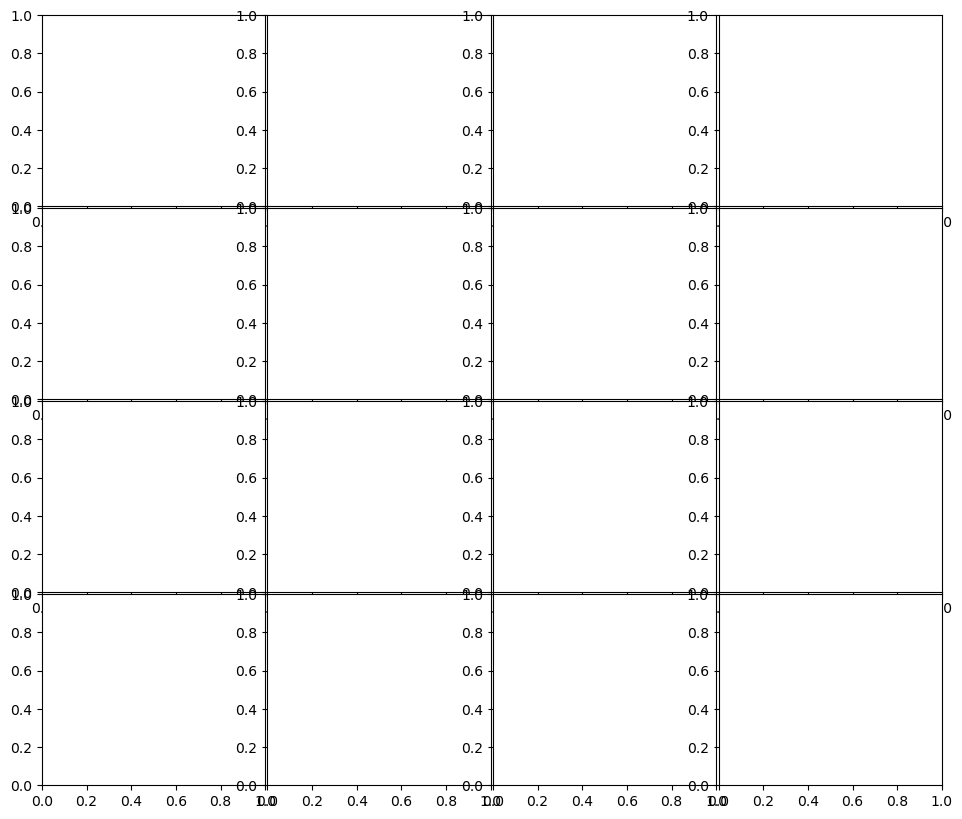

In [48]:
fig, ax = plt.subplots(4,4,figsize = (10,10))
plt.subplots_adjust(hspace=0.01,left=0,wspace=0.01)

In [49]:
stat_map = new_img_like(aal_resampled,stat_map)

In [50]:
region_pvals

{'Putamen_R': (1.274967246209521e-26, 11.36755407525032),
 'ParaHippocampal_R': (3.2923886581214947e-25, 11.002345867842056),
 'Angular_L': (1.1767444608525433e-22, 10.323379248603676),
 'Amygdala_L': (1.4779578639332689e-22, 10.29652113369198),
 'ParaHippocampal_L': (3.952467979549204e-21, 9.904276926277271),
 'Insula_R': (2.494703258021987e-20, 9.680018529119804),
 'Temporal_Sup_L': (4.266471309483217e-19, 9.327653455910161),
 'Frontal_Inf_Oper_R': (5.513724563423582e-19, 9.295393640445841),
 'Hippocampus_R': (5.671520731397197e-19, 9.291839610908532),
 'Angular_R': (7.367853287650294e-19, 9.258838000249591),
 'Amygdala_R': (1.4669302994790232e-18, 9.171608655305146),
 'Occipital_Mid_R': (3.785268028585742e-18, 9.050607806231271),
 'Caudate_R': (4.749592075233451e-17, 8.72216077154093),
 'Parietal_Inf_L': (8.759905020367958e-16, 8.332649038266194),
 'SupraMarginal_R': (1.4881762421150396e-14, 7.941202367435992),
 'Cerebelum_4_5_R': (2.1929591224601746e-14, 7.886527937515093),
 'Rolan

In [51]:
tvals = np.array([v[1] for k,v in region_pvals.items()])

(array([11., 18.,  5., 11.,  8.,  6.,  2.,  7.,  3.,  2.]),
 array([ 3.54696044,  4.3290198 ,  5.11107917,  5.89313853,  6.67519789,
         7.45725726,  8.23931662,  9.02137598,  9.80343535, 10.58549471,
        11.36755408]),
 <BarContainer object of 10 artists>)

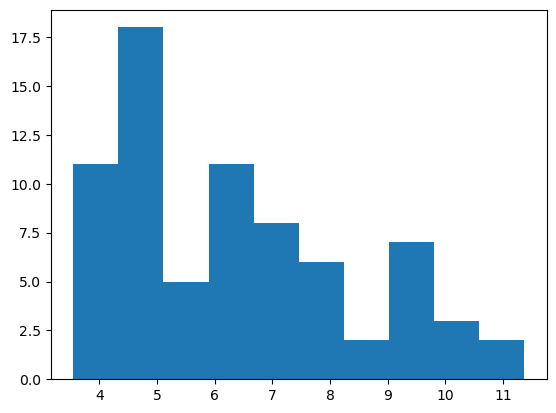

In [52]:
plt.hist(tvals)

In [53]:
nib.save(aal_resampled,'aal_resampled.nii.gz')

In [54]:
nib.save(stat_map,'stat_map_ttest.nii.gz')

#### Memory plot

In [71]:
r_p = { 
    'Heschl_R': 2.891956579747198e-57,
 'Temporal_Sup_R': 2.7130328164853375e-54,
 'Rolandic_Oper_L': 2.544730420770163e-53,
 'Calcarine_L': 9.170463186254485e-53,
 'Frontal_Med_Orb_R': 1.1289983063974963e-50,
 'Frontal_Inf_Tri_L': 8.360408732205229e-08,
 'ParaHippocampal_R': 7.541113810386926e-06}

In [197]:
stat_map = np.zeros_like(aal_resampled.get_fdata(),dtype=np.float)

/tmp/ipykernel_4126587/3177455105.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  stat_map = np.zeros_like(aal_resampled.get_fdata(),dtype=np.float)


In [198]:
regions['ParaHippocampal_R']

40

In [110]:
for index,row in df.iterrows():
    if row['regions'] in r_p:
        stat_map[aal_resampled.get_fdata() == index] = -np.log(r_p[row['regions']])

In [199]:
stat_map[aal_resampled.get_fdata() == 40] = 40

In [200]:
stat_map_memory = new_img_like(aal_resampled,stat_map)

In [ ]:
nib.save(stat_map_memory,'ParaHippocampal_R.nii.gz')

#### Sex plot

In [61]:
s_p = {
     'Putamen_R': 4.847577808321278e-25,
 'Frontal_Inf_Tri_L': 3.89573189046448e-17,
 'ParaHippocampal_L': 5.2944378059563474e-17,
 'ParaHippocampal_R': 5.599273026721456e-17,
 'Amygdala_L': 9.978679346748281e-16,
 'Hippocampus_R': 1.0129135620257567e-14,
 'Amygdala_R': 2.1966340859794804e-14,
}

In [161]:
stat_map = np.zeros_like(aal_resampled.get_fdata(),dtype=np.float)

/tmp/ipykernel_4126587/3177455105.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  stat_map = np.zeros_like(aal_resampled.get_fdata(),dtype=np.float)


In [162]:
regions['Amygdala_R']

42

In [70]:
for index,row in df.iterrows():
    if row['regions'] in s_p:
        stat_map[aal_resampled.get_fdata() == index] = np.log(s_p[row['regions']])

In [163]:
stat_map[aal_resampled.get_fdata() == 42] = 42

In [164]:
stat_map_sex = new_img_like(aal_resampled,stat_map)

In [165]:
nib.save(stat_map_sex,'Amygdala_R_sex.nii.gz')